# Week3授業前課題1 アヤメの分析

## 1.このテキストについて

- テキストの目的
- データ分析の基本的な流れを知る
- データ分析ライブラリのPandasに慣れる

## 2.フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

## 3.データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation

<img src="./img/1.jpg">

目的変数も同様にyに格納してください。

<img src="./img/2.jpg">

In [1]:
# アイリスデータの読み込み
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset = load_iris()

In [2]:
# 説明変数をDataFrameオブジェクトとして読み込み
columns_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_X = pd.DataFrame(data=iris_dataset['data'], columns=columns_list)
df_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 目的変数をDataFrameオブジェクトとして読み込み
df_y = pd.DataFrame(data=iris_dataset['target'], columns=['Species'])
df_y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

<img src="./img/3.jpg">

In [4]:
df_xy = pd.DataFrame.join(df_X, df_y)
df_xy.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# 別解
df_xy2 = pd.merge(df_X, df_y, left_index=True, right_index=True)
df_xy2.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4.データの概観

## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [6]:
# 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
df_xy.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# ラベルごとのサンプル数の合計を出力する。
df_xy['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [8]:
# 特徴量に欠損値があるかを確認する。
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [23]:
df_xy.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [11]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df_xy.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

## 5.特徴量についての探索

各特徴量や特徴量同士の関係を見ていきます。

## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


1. sepal_widthの列を３つの異なる方法で抽出する
2. 50番目から99番目までのデータを抽出する
3. petal_lengthの列の50番目から99番目までのデータを抽出する
4. petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

### 結論（まとめ）

【.loc、.ilocの違い】
- .locは行ラベル、 列ラベルを指定。スライス時、通常のスライスとは異なり終点を含む。<br>
- .ilocは行の番号、列の番号を指定。スライス時、通常のスライスと同様に終点を含まない。
<br>
<br>

【抽出方法】
1. sepal_widthの列を３つの異なる方法で抽出する
  - df['sepal_width']
  - df.sepal_width
  - df.loc[:, 'sepal_width']
  - df.iloc[:, 3]
- 50番目から99番目までのデータを抽出する
  - df[50:100]
  - df[50:100, :]
  - df.loc[10:99]
  - df.iloc[10:100]
- petal_lengthの列の50番目から99番目までのデータを抽出する
  - df[50:100, 'petal_length']
  - df.loc[10:99, 'petal_length']
  - df.iloc[10:100, 2]
- petal_widthの値が0.2のデータを抽出する
  - df[df['petal_width'] == 0.2]
  - df.loc[df['petal_width'] == 0.2]


以下はその実行結果

In [12]:
# 方法1
print("1. sepal_widthの列を３つの異なる方法で抽出する")
print(df_xy['sepal_width'])

print("\n※学習メモ：複数指定の場合は[[]]とする。\n" \
      + "  単独列の抽出で[[]]と入れ子にすると、SeriesではなくDataFrameになる \n", \
      + df_xy[['sepal_width', 'Species']])

print("\n2. 50番目から99番目までのデータを抽出する")
print(df_xy[50:100])

print("\n3. petal_lengthの列の50番目から99番目までのデータを抽出する")
print("なし")

print("\n4. petal_widthの値が0.2のデータを抽出する")
print(df_xy[df_xy['petal_width'] == 0.2])

1. sepal_widthの列を３つの異なる方法で抽出する
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

※学習メモ：複数指定の場合は[[]]とする。
  単独列の抽出で[[]]と入れ子にすると、SeriesではなくDataFrameになる 
      sepal_width  Species
0            3.5      0.0
1            3.0      0.0
2            3.2      0.0
3            3.1      0.0
4            3.6      0.0
..           ...      ...
145          3.0      2.0
146          2.5      2.0
147          3.0      2.0
148          3.4      2.0
149          3.0      2.0

[150 rows x 2 columns]

2. 50番目から99番目までのデータを抽出する
    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8         

In [13]:
# 方法2
print("1. sepal_widthの列を３つの異なる方法で抽出する")
print(df_xy.loc[:, 'sepal_width'])

print("\n2. 50番目から99番目までのデータを抽出する")
print(df_xy.loc[50:99])

print("\n3. petal_lengthの列の50番目から99番目までのデータを抽出する")
print(df_xy.loc[50:99,['petal_length']])

print("\n4. petal_widthの値が0.2のデータを抽出する")
print(df_xy.loc[df_xy['petal_width'] == 0.2])

1. sepal_widthの列を３つの異なる方法で抽出する
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

2. 50番目から99番目までのデータを抽出する
    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
57           4.9          2.4           3.3          1.0        1
58           6.6          2.9           4.6          1.3        1
59           5.2          2.7           3.9          1.4        1
60           5.0          2.0           3.5      

In [14]:
# 方法3（iloc）
print("1. sepal_widthの列を３つの異なる方法で抽出する")
print(df_xy.iloc[:, 1])
print("\n2. 50番目から99番目までのデータを抽出する")
print(df_xy.iloc[50:100])
print("\n3. petal_lengthの列の50番目から99番目までのデータを抽出する")
print(df_xy.iloc[50:100, 2])
print("\n4. petal_widthの値が0.2のデータを抽出する")
print('なし')

1. sepal_widthの列を３つの異なる方法で抽出する
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

2. 50番目から99番目までのデータを抽出する
    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
57           4.9          2.4           3.3          1.0        1
58           6.6          2.9           4.6          1.3        1
59           5.2          2.7           3.9          1.4        1
60           5.0          2.0           3.5      

## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

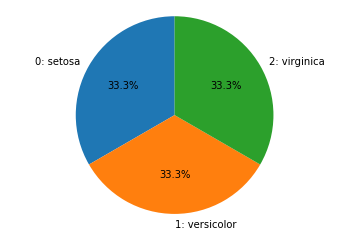

In [24]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

# データの用意
name_map = {'0': 'setosa', '1': 'versicolor', '2': 'virginica'}
pie_x = df_xy['Species'].value_counts()
pie_labels = [key+': '+value for key, value in name_map.items()]

plt.pie(x=pie_x,
       labels=pie_labels,
       autopct='%.1f%%',
       startangle=90)

plt.axis('equal')
plt.show()

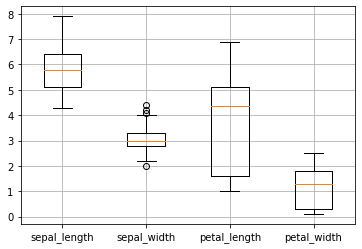

In [17]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

columns_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.boxplot(
    [df_xy['sepal_length'], 
     df_xy['sepal_width'], 
     df_xy['petal_length'], 
     df_xy['petal_width']],
    labels=columns_list)

plt.grid(True)
plt.show()      

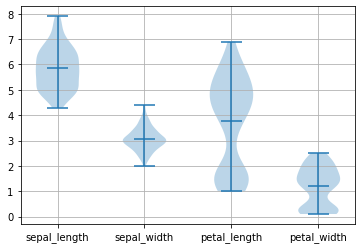

In [18]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
fig = plt.figure()
ax = fig.add_subplot(111)

ax.violinplot(
    [df_xy['sepal_length'], 
     df_xy['sepal_width'], 
     df_xy['petal_length'], 
     df_xy['petal_width']],
     showmeans=True  # 平均値を表示
)

ax.set_xticks(list(range(1,5)))
ax.set_xticklabels(columns_list)

plt.grid(True)
plt.show() 

【箱ひげ図とバイオリン図の違い】
1. 箱ひげ図
  - 四分位範囲、中央値、最大値、最小値、外れ値を可視化することができる。
  - 四分位範囲を確認することで分散の大小もある程度把握することができるが、分布の形状までは把握できない。
2. バイオリン図
  - 分布形状の可視化が可能。山が2つ以上ある分布の場合、箱ひげ図では可視化が難しいが、バイオリン図ではそれが可能。
  - グラフの知名度が低いため、説明が必要になる。

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

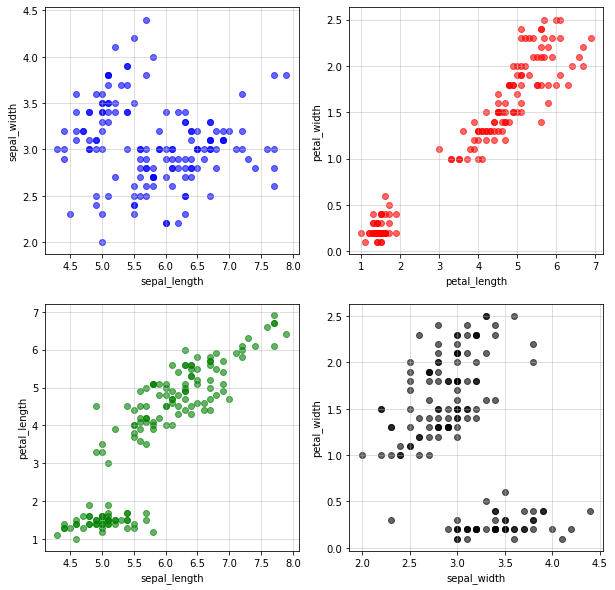

In [19]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(df_xy['sepal_length'], df_xy['sepal_width'], color='blue', alpha=0.6)
ax2.scatter(df_xy['petal_length'], df_xy['petal_width'], color='red', alpha=0.6)
ax3.scatter(df_xy['sepal_length'], df_xy['petal_length'], color='green', alpha=0.6)
ax4.scatter(df_xy['sepal_width'], df_xy['petal_width'], color='black', alpha=0.6)

ax1.set_xlabel('sepal_length')
ax1.set_ylabel('sepal_width')
ax2.set_xlabel('petal_length')
ax2.set_ylabel('petal_width')
ax3.set_xlabel('sepal_length')
ax3.set_ylabel('petal_length')
ax4.set_xlabel('sepal_width')
ax4.set_ylabel('petal_width')


ax1.grid(True, alpha=0.5)
ax2.grid(True, alpha=0.5)
ax3.grid(True, alpha=0.5)
ax4.grid(True, alpha=0.5)
plt.show()

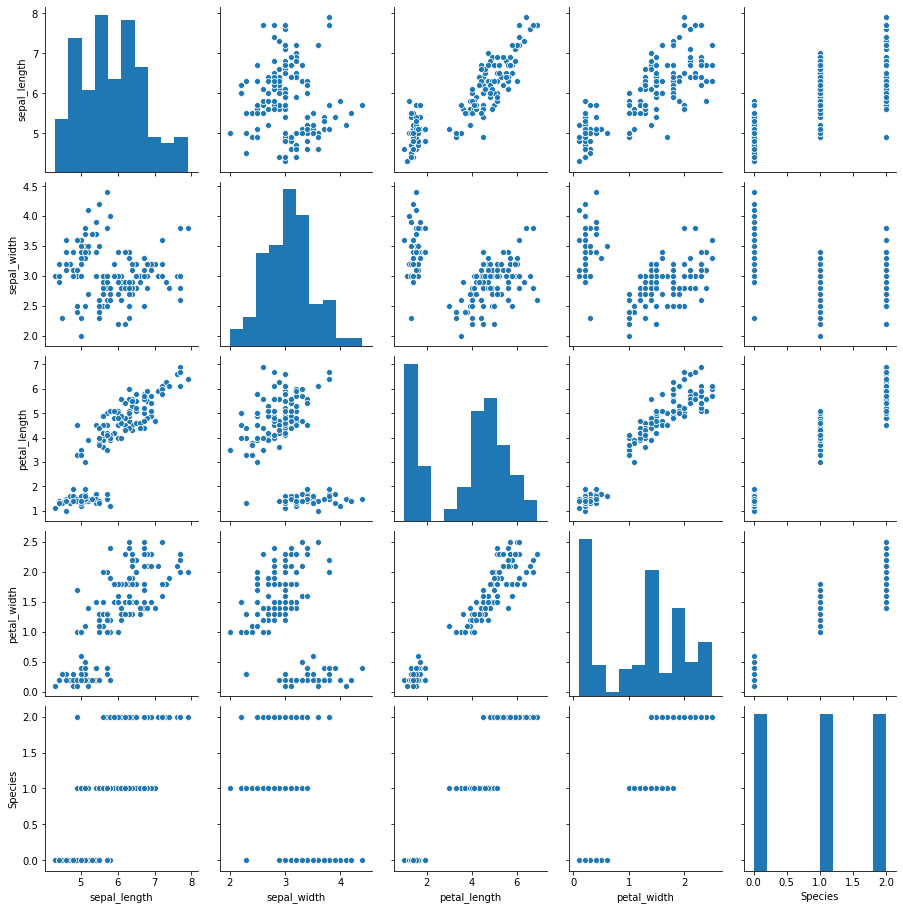

In [20]:
sns.pairplot(df_xy)
plt.show()

In [21]:
df_xy.corr()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


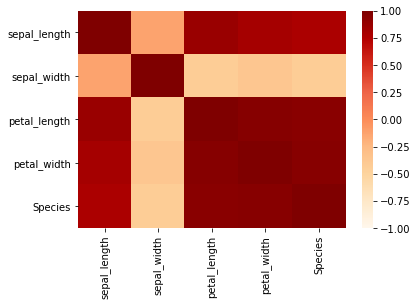

In [22]:
sns.heatmap(df_xy.corr(), 
            vmin = -1, 
            vmax = 1,
            cmap = 'OrRd')
plt.show()

## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

1. 3種類のアヤメについて
  - 相関係数行列より、'sepal_length', 'petal_length', 'petal_width'は目的変数'Species'との間に強い正の相関があることがわかり<br>
    散布図行列からも、'sepal_length', 'petal_length', 'petal_width'の値について下記傾向が見られる。<br>
    0:setosa < 1:versicolor < 2:virginica
2. 説明変数について
  - 'petal_length', 'petal_width'は'Species'との相関係数が非常に高く、<br>
    また散布図より、'petal_length', 'petal_width'のいずれか一方のみで0:setosaを完全に分類できているため、<br>
    非常に特徴的な説明変数であると言える。
  - そのため、バイオリン図から確認できる 'petal_length', 'petal_width'の分布(山が2個のバイ・モーダル分布)は<br>
    0:setosa とその他のアヤメとの特徴の違いによるものと理解できる。
  - 全体的に相関係数が高いが、sepal_widthのみ傾向が異なり、sepal_widthと他の変数間の相関係数は全て負の値となっている。
  - sepal_widthが高いと0:setosaである傾向があり、低いと1:versicolorである傾向があるため、(後者の関係はやや弱いが)<br>
    sepal_widthは、0:setosaや1:versicolorを判別するための特徴量として使用できる可能性がある。